In order to analyze this 4th grade data set I decided to use Python to import the Excel sheet.   
I cleaned and organized the data as best I could.
The cluster names are really long and not suitable for indexing programmatically as they stand.

I used a Jupyter notebook that allows me to run my Python scripts and display the outputs on a single web page. This is what I use for my data science master's curriculum at URI.

Since this a test I felt it may a good idea to display some Python code, but that does pollute the presentation.  Normally the code is not displayed for end users.

In [20]:
import pandas as pd

ELA_CTA_DATA = pd.read_excel('4thGrade_ELA.CTA.Data_AnalystTask_master.xlsx', 
                             #usecols=lambda x: 'Unnamed' not in x,
                             sheet_name=None)

# Remove unwanted characters from column names
ELA_CTA_DATA['ES1_4thGrade_Tri1_20162017'].columns = ELA_CTA_DATA['ES1_4thGrade_Tri1_20162017'].columns.str.replace('_x000D_\n', '')

# Let's clean ALL columns of ALL sheets
for sheet_name, df in ELA_CTA_DATA.items():
    df.columns = df.columns.str.replace('_x000D_\n', '')

In [21]:
# Let's change all values in Student ID column from NaN to 0

for sheet_name, df in ELA_CTA_DATA.items():

    #if "student id" in df[0].lower():
    df.columns.values[0] = "StudentID"
    df.columns = df.columns.str.strip()
    
    # convert any non-numeric to zero
    df['StudentID'] = pd.to_numeric(df['StudentID'], errors='coerce')
    df['StudentID'] = df['StudentID'].fillna(0)
    
    # Convert 'StudentID' column to integers
    df['StudentID'] = df['StudentID'].astype(int)

    # Convert the 2nd Columns to name: 'Class'
    df.columns.values[1] = "Class"
    #df.columns = df.columns.str.strip()
    
    # Convert 3rd Col to 'Overall Avg'
    df.columns.values[2] = "Overall Avg"
    df.columns = df.columns.str.strip()
    df['Overall Avg'] = pd.to_numeric(df['Overall Avg'], errors='coerce')
    df['Overall Avg'] = df['Overall Avg'].fillna(0)
    
    df.drop( list(df.filter(regex='Unnamed')), axis=1, inplace=True)

In [22]:
# For the ES1 Tr1 vs Tr2 for the 2016/2017 school year

import numpy as np

# Initialize a nested dictionary to store statistics for ES1 and ES2
statistics = {'ES1': {}, 'ES2': {}}

# Define trimesters and years
trimesters = ['TR1', 'TR2']
years = ['2016', '2017']

# Iterate over schools
for school in statistics.keys():
    # Initialize school level dictionary
    statistics[school] = {}
    
    # Iterate over years
    for year in years:
        # Initialize year level dictionary
        statistics[school][year] = {}
        
        # Iterate over trimesters
        for trimester in trimesters:
            # Initialize trimester level dictionary
            statistics[school][year][trimester] = {}

# for each StudentID in ES1_4thGrade_Tri2_20162017
# students may not be in the school for Tr2 or may be new students for Tr2

Tr1 = ELA_CTA_DATA['ES1_4thGrade_Tri1_20162017'].iloc[2:, :3]
Tr2 = ELA_CTA_DATA['ES1_4thGrade_Tri2_20162017'].iloc[2:, :3]

grades_delta = np.array([])

for index, row in Tr2.iterrows():

    Tr2_StudentID = row['StudentID']       # Some students are missing in Tr2. Perhaps they transfered schools 

    index = Tr1['StudentID'].index[Tr1['StudentID'] == Tr2_StudentID]
    if index.size > 0:
            
        Tr2_grade = row['Overall Avg']             # Get Tr2 Grade for this StudentID    
        Tr1_grade = Tr1['Overall Avg'][index[0]]   # Get Tr1 Grade for this StudentID
    
        grades_delta = np.append( grades_delta, Tr2_grade-Tr1_grade )
        
statistics['ES1']['2016']['TR1']['mean']   = Tr1['Overall Avg'].mean()
statistics['ES1']['2016']['TR1']['median'] = Tr1['Overall Avg'].median()
statistics['ES1']['2016']['TR1']['std']    = Tr1['Overall Avg'].std()
statistics['ES1']['2016']['mean_delta'] = grades_delta.mean()

statistics['ES1']['2016']['TR2']['mean']   = Tr2['Overall Avg'].mean()
statistics['ES1']['2016']['TR2']['median'] = Tr2['Overall Avg'].median()
statistics['ES1']['2016']['TR2']['std']    = Tr2['Overall Avg'].std()
statistics['ES1']['2016']['std_delta'] = grades_delta.std()

In [23]:
# Let's repeat for ES1 Tr1 vs Tr2 for the 2017/2018 school year
import numpy as np

# for each StudentID in ES1_4thGrade_Tri2_20172018
# students may not be in the school for Tr2

Tr1 = ELA_CTA_DATA['ES1_4thGrade_Tri1_20172018'].iloc[2:, :3]
Tr2 = ELA_CTA_DATA['ES1_4thGrade_Tri2_20172018'].iloc[2:, :3]

grades_delta = np.array([])

for index, row in Tr2.iterrows():

    Tr2_StudentID = row['StudentID']       # Some students are missing in Tr2. Perhaps they transfered schools 

    index = Tr1['StudentID'].index[Tr1['StudentID'] == Tr2_StudentID]
    if index.size > 0:
            
        Tr2_grade = row['Overall Avg']             # Get Tr2 Grade for this StudentID    
        Tr1_grade = Tr1['Overall Avg'][index[0]]   # Get Tr1 Grade for this StudentID
    
        grades_delta = np.append( grades_delta, Tr2_grade-Tr1_grade )
          
#print("--------------------------------------")

statistics['ES1']['2017']['TR1']['mean']   = Tr1['Overall Avg'].mean()
statistics['ES1']['2017']['TR1']['median'] = Tr1['Overall Avg'].median()
statistics['ES1']['2017']['TR1']['std']    = Tr1['Overall Avg'].std()
statistics['ES1']['2017']['mean_delta'] = grades_delta.mean()

statistics['ES1']['2017']['TR2']['mean']   = Tr2['Overall Avg'].mean()
statistics['ES1']['2017']['TR2']['median'] = Tr2['Overall Avg'].median()
statistics['ES1']['2017']['TR2']['std']    = Tr2['Overall Avg'].std()
statistics['ES1']['2017']['std_delta'] = grades_delta.std()

In [24]:
# Let's repeat for ES2 Tr1 vs Tr2 for the 2016/2017 school year
import numpy as np

# for each StudentID in ES2_4thGrade_Tri2_20162017
# students may not be in the school for Tr2

Tr1 = ELA_CTA_DATA['ES2_4thGrade_Tri1_20162017'].iloc[2:, :3]
Tr2 = ELA_CTA_DATA['ES2_4thGrade_Tri2_20162017'].iloc[2:, :3]

grades_delta = np.array([])

for index, row in Tr2.iterrows():

    Tr2_StudentID = row['StudentID']       # Some students are missing in Tr2. Perhaps they transfered schools 

    index = Tr1['StudentID'].index[Tr1['StudentID'] == Tr2_StudentID]
    if index.size > 0:
            
        Tr2_grade = row['Overall Avg']             # Get Tr2 Grade for this StudentID    
        Tr1_grade = Tr1['Overall Avg'][index[0]]   # Get Tr1 Grade for this StudentID
    
        grades_delta = np.append( grades_delta, Tr2_grade-Tr1_grade )

statistics['ES2']['2016']['TR1']['mean']   = Tr1['Overall Avg'].mean()
statistics['ES2']['2016']['TR1']['median'] = Tr1['Overall Avg'].median()
statistics['ES2']['2016']['TR1']['std']    = Tr1['Overall Avg'].std()
statistics['ES2']['2016']['mean_delta'] = grades_delta.mean()

statistics['ES2']['2016']['TR2']['mean']   = Tr2['Overall Avg'].mean()
statistics['ES2']['2016']['TR2']['median'] = Tr2['Overall Avg'].median()
statistics['ES2']['2016']['TR2']['std']    = Tr2['Overall Avg'].std()
statistics['ES2']['2016']['std_delta'] = grades_delta.std()

In [25]:
# Let's repeat for ES2 Tr1 vs Tr2 for the 2017/2018 school year
import numpy as np

# for each StudentID in ES2_4thGrade_Tri2_20172018
# students may not be in the school for Tr2

Tr1 = ELA_CTA_DATA['ES2_4thGrade_Tri1_20172018'].iloc[2:, :3]
Tr2 = ELA_CTA_DATA['ES2_4thGrade_Tri2_20172018'].iloc[2:, :3]

grades_delta = np.array([])

for index, row in Tr2.iterrows():

    Tr2_StudentID = row['StudentID']     # Some students are maybe missing in Tr2. Perhaps they transfered schools 

    index = Tr1['StudentID'].index[Tr1['StudentID'] == Tr2_StudentID]
    if index.size > 0:
            
        Tr2_grade = row['Overall Avg']             # Get Tr2 Grade for this StudentID    
        Tr1_grade = Tr1['Overall Avg'][index[0]]   # Get Tr1 Grade for this StudentID
    
        grades_delta = np.append( grades_delta, Tr2_grade-Tr1_grade )

statistics['ES2']['2017']['TR1']['mean']   = Tr1['Overall Avg'].mean()
statistics['ES2']['2017']['TR1']['median'] = Tr1['Overall Avg'].median()
statistics['ES2']['2017']['TR1']['std']    = Tr1['Overall Avg'].std()
statistics['ES2']['2017']['mean_delta'] = grades_delta.mean()

statistics['ES2']['2017']['TR2']['mean']   = Tr2['Overall Avg'].mean()
statistics['ES2']['2017']['TR2']['median'] = Tr2['Overall Avg'].median()
statistics['ES2']['2017']['TR2']['std']    = Tr2['Overall Avg'].std()
statistics['ES2']['2017']['std_delta'] = grades_delta.std()


### Summary statistics table for all of the data:

In [26]:
# Let's build a table that displays basic statistics for all 8 datasets

print("2016-2017 School Year")
print("Statistics     ES1 Tr1 ES1 Tr2     ES2 Tr1 ES2 Tr2")
print("----------------------------------------------------")


print("Mean:         {:6.1f}  {:6.1f}  \t  {:6.1f}  {:6.1f} ".format(statistics['ES1']['2016']['TR1']['mean'],      
                                                                     statistics['ES1']['2016']['TR2']['mean'],
                                                                     statistics['ES2']['2016']['TR1']['mean'],      
                                                                     statistics['ES2']['2016']['TR2']['mean']))

print("Median:       {:6.1f}  {:6.1f}  \t  {:6.1f}  {:6.1f} ".format(statistics['ES1']['2016']['TR1']['median'],      
                                                                     statistics['ES1']['2016']['TR2']['median'],
                                                                     statistics['ES2']['2016']['TR1']['median'],      
                                                                     statistics['ES2']['2016']['TR2']['median']))


print("StdDev:       {:6.1f}  {:6.1f}  \t  {:6.1f}  {:6.1f} ".format(statistics['ES1']['2016']['TR1']['std'],      
                                                                     statistics['ES1']['2016']['TR2']['std'],
                                                                     statistics['ES2']['2016']['TR1']['std'],      
                                                                     statistics['ES2']['2016']['TR2']['std']))

print("\n2017-2018 School Year")
print("Statistics     ES1 Tr1 ES1 Tr2     ES2 Tr1 ES2 Tr2")
print("----------------------------------------------------")


print("Mean:         {:6.1f}  {:6.1f}  \t  {:6.1f}  {:6.1f} ".format(statistics['ES1']['2017']['TR1']['mean'],      
                                                                     statistics['ES1']['2017']['TR2']['mean'],
                                                                     statistics['ES2']['2017']['TR1']['mean'],      
                                                                     statistics['ES2']['2017']['TR2']['mean']))

print("Median:       {:6.1f}  {:6.1f}  \t  {:6.1f}  {:6.1f} ".format(statistics['ES1']['2017']['TR1']['median'],      
                                                                     statistics['ES1']['2017']['TR2']['median'],
                                                                     statistics['ES2']['2017']['TR1']['median'],      
                                                                     statistics['ES2']['2017']['TR2']['median']))


print("StdDev:       {:6.1f}  {:6.1f}  \t  {:6.1f}  {:6.1f} ".format(statistics['ES1']['2017']['TR1']['std'],      
                                                                     statistics['ES1']['2017']['TR2']['std'],
                                                                     statistics['ES2']['2017']['TR1']['std'],      
                                                                     statistics['ES2']['2017']['TR2']['std']))




2016-2017 School Year
Statistics     ES1 Tr1 ES1 Tr2     ES2 Tr1 ES2 Tr2
----------------------------------------------------
Mean:           60.4    64.1  	    46.4    59.4 
Median:         60.0    66.0  	    45.0    62.0 
StdDev:         16.4    14.4  	    17.1    19.4 

2017-2018 School Year
Statistics     ES1 Tr1 ES1 Tr2     ES2 Tr1 ES2 Tr2
----------------------------------------------------
Mean:           60.0    64.8  	    53.6    59.8 
Median:         62.5    66.0  	    56.0    67.0 
StdDev:         18.4    19.7  	    17.0    22.6 


Comparing the means in the table above, ES1 has outperformed ES2 as a whole for every Trimester in 2016-2017 and most of 2017-2018. 






### Data Normality

The left column corresponds to ES1, the right to ES2.
Most of the ES2 data sets are NOT normal. This could indicate the overall average data has discrepancies.
This makes it more challenging to apply basic statistics and trust the outcomes since it relies on having somewhat normaly distributed data.

Here are are the distributions per trimester:


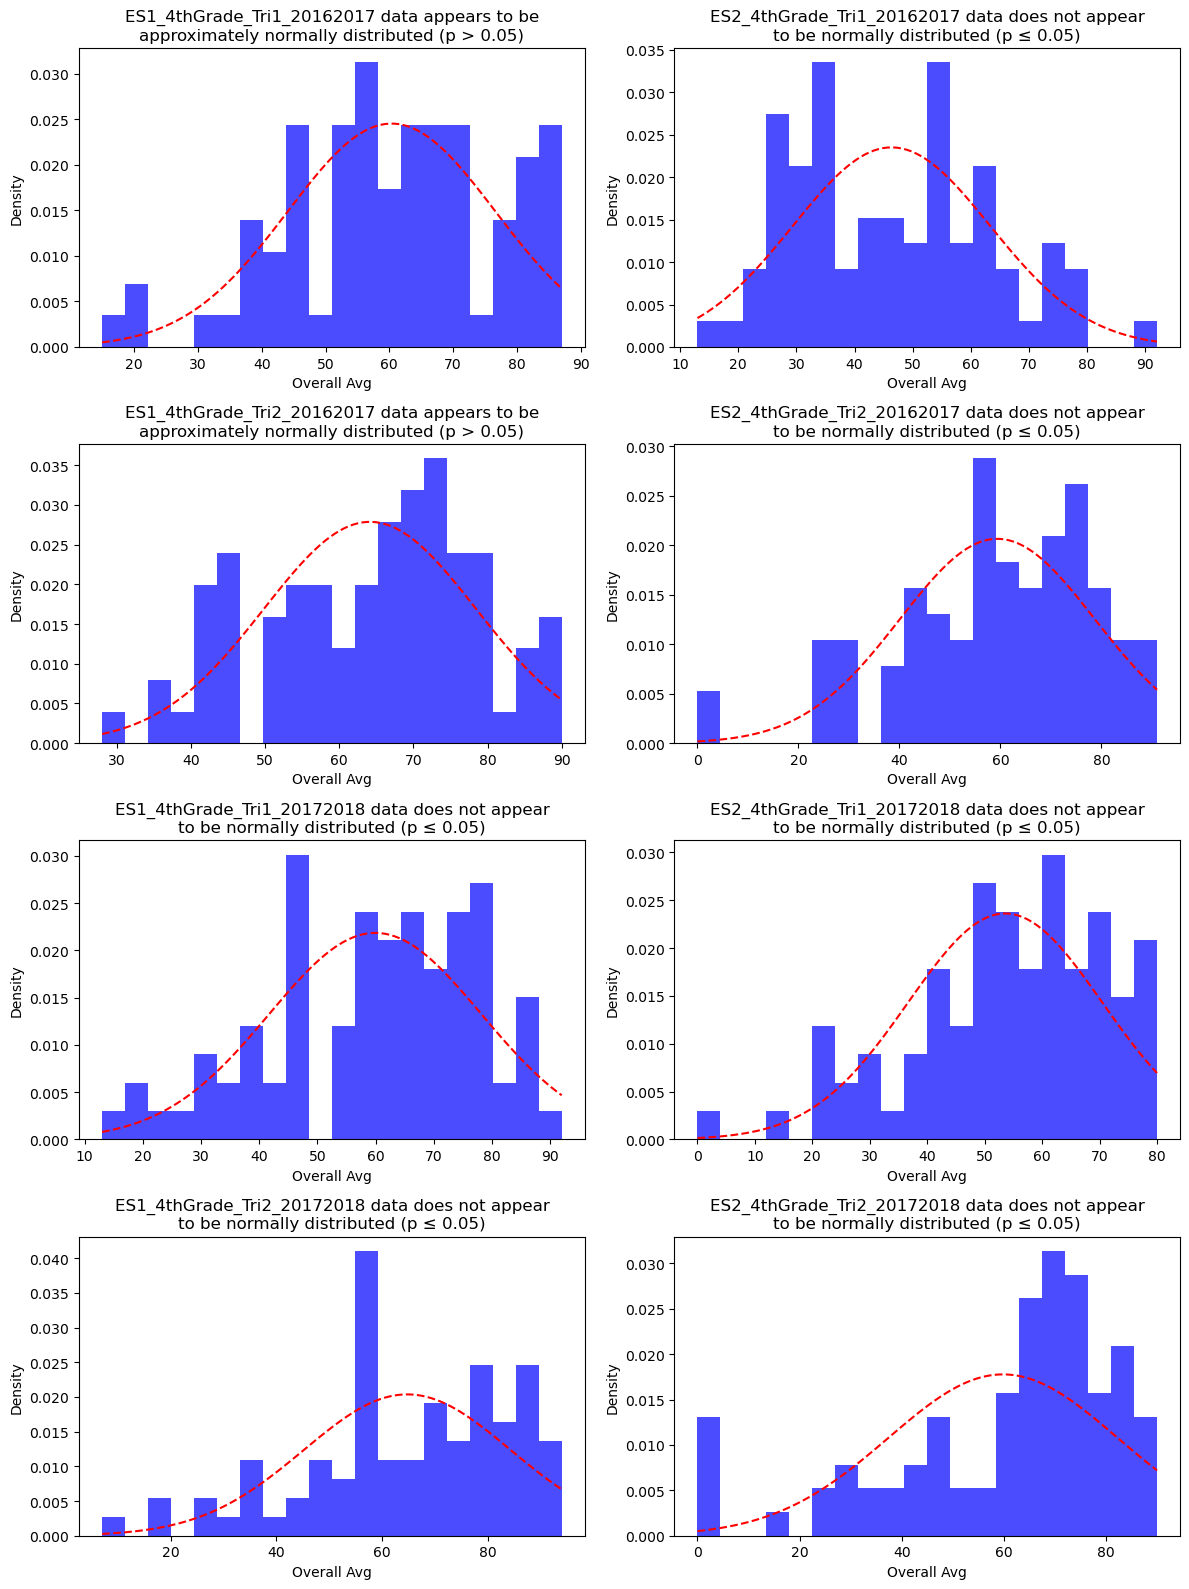

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, shapiro

def analyze_dataset(data, label, axs):
    # Perform Shapiro-Wilk test
    statistic, p_value = shapiro(data)

    # Set label based on p-value
    if p_value > 0.05:
        data_label = f"{label} data appears to be\napproximately normally distributed (p > 0.05)"
    else:
        data_label = f"{label} data does not appear\nto be normally distributed (p ≤ 0.05)"

    # Plot histogram
    axs.hist(data, bins=20, color='blue', alpha=0.7, density=True)
    axs.set_title(data_label)
    axs.set_xlabel('Overall Avg')
    axs.set_ylabel('Density')

    # Plot normal distribution curve
    x = np.linspace(min(data), max(data), 100)
    axs.plot(x, norm.pdf(x, np.mean(data), np.std(data)), color='red', linestyle='--')

# Create a figure with subplots
fig, axs = plt.subplots(4, 2, figsize=(12, 16))
axs = axs.flatten()

# Get the keys of the dictionary
dataset_keys = ELA_CTA_DATA.keys()

# Analyze each dataset and create plots
for i, key in enumerate(dataset_keys):
    data = ELA_CTA_DATA[key].iloc[2:, :3]['Overall Avg']
    analyze_dataset(data, key, axs[i])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


### Regression Models:

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

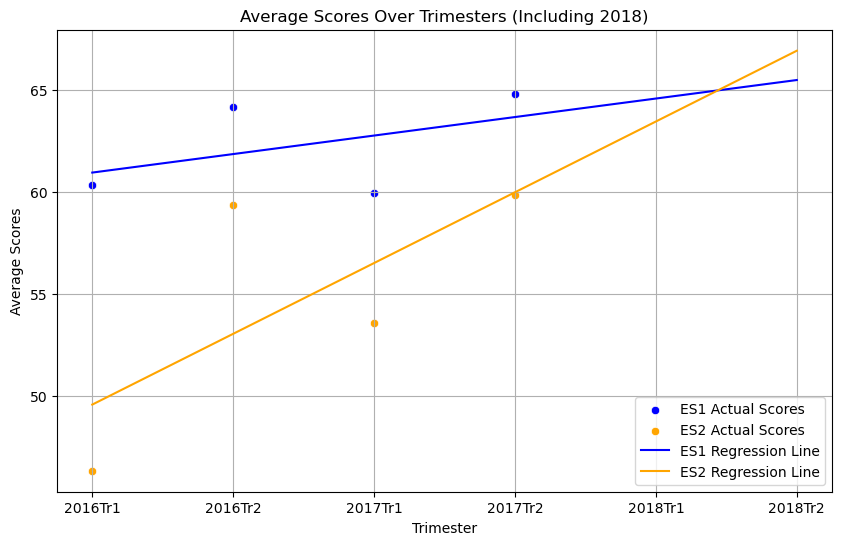

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dates for each trimester
trimester_dates = ['2016Tr1', '2016Tr2', '2017Tr1', '2017Tr2']

# Average scores for ES1
average_scores_ES1 = [ 
    statistics['ES1']['2016']['TR1']['mean'],
    statistics['ES1']['2016']['TR2']['mean'],
    statistics['ES1']['2017']['TR1']['mean'],
    statistics['ES1']['2017']['TR2']['mean']
]

# Average scores for ES2
average_scores_ES2 = [ 
    statistics['ES2']['2016']['TR1']['mean'],
    statistics['ES2']['2016']['TR2']['mean'],
    statistics['ES2']['2017']['TR1']['mean'],
    statistics['ES2']['2017']['TR2']['mean']
]

# Convert trimester dates to numeric values for regression
x_values = np.arange(len(trimester_dates))

# Perform linear regression for ES1
slope_ES1, intercept_ES1 = np.polyfit(x_values, average_scores_ES1, 1)

# Perform linear regression for ES2
slope_ES2, intercept_ES2 = np.polyfit(x_values, average_scores_ES2, 1)

# Extend the x-values to include 2018 trimesters
extended_x_values = np.arange(len(trimester_dates) + 2)

# Predicted scores for ES1 using the regression line
predicted_scores_ES1 = slope_ES1 * extended_x_values + intercept_ES1

# Predicted scores for ES2 using the regression line
predicted_scores_ES2 = slope_ES2 * extended_x_values + intercept_ES2

# Plot the original data and extended regression lines for both ES1 and ES2
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_values, y=average_scores_ES1, color='blue', label='ES1 Actual Scores')
sns.scatterplot(x=x_values, y=average_scores_ES2, color='orange', label='ES2 Actual Scores')
sns.lineplot(x=extended_x_values, y=predicted_scores_ES1, color='blue', label='ES1 Regression Line')
sns.lineplot(x=extended_x_values, y=predicted_scores_ES2, color='orange', label='ES2 Regression Line')
plt.xticks(extended_x_values, trimester_dates + ['2018Tr1', '2018Tr2'])  # Set x-axis ticks to include 2018
plt.xlabel('Trimester')
plt.ylabel('Average Scores')
plt.title('Average Scores Over Trimesters (Including 2018)')
plt.legend()
plt.grid(True)
plt.show()


Based on the CTA data, 4th grade scholars at ES1 and ES2 will perform better compared to last year’s 4th grade scholars on the state standardized assessment.  Both models show an upward trend with ES2 possibly outperforming ES1 for the 2018 school year.  
I took the average of the "Overall Average" column for each of the 8 data sets.




Where is ES1 outperforming ES2??

In order to compare the clusters to determine where ES1 is outperforming ES2 I would need to standardize the cluster names to make sure I am comparing them correctly.

### Sequential Trimester comparisons per school:

I attempted to compared sequestial trimesters per school, per year to show any changes in scores.
The test cluster names do not match up perfectly therefore I only compared those clusters that have identical names in both trimesters.  


There are tables and plots:

In [30]:
from IPython.display import HTML

# Loop thru the clusters for ES1 Tr1 & Tr2. Compare any common clusters reported in the datasets.

data = []

Tr1 = ELA_CTA_DATA['ES1_4thGrade_Tri1_20162017'].iloc[:, 3:]
Tr2 = ELA_CTA_DATA['ES1_4thGrade_Tri2_20162017'].iloc[:, 3:]

# These clusters are in common Tr1 & Tr2 for 2016/2017
for col in Tr2.columns:
    if( col in Tr1.columns):
        
        data.append( (col, Tr2[col][1], Tr1[col][1]))

df_combined = pd.DataFrame(data)
df_combined.columns = ['ES1 4thGrade 2016-2017 Overall % for Standard Clusters', 'Tr1', 'Tr2']

df_combined = df_combined.reset_index(drop=True)

HTML(df_combined.to_html(index=False))


ES1 4thGrade 2016-2017 Overall % for Standard Clusters,Tr1,Tr2
Informational Writing Informational Writing,0.48,0.61
Informational Writing Informational Writing - Reading Comp,0.55,0.55
Language L 4.1/2,0.78,0.66
Narrative Writing Narrative Writing,0.47,0.54
R.4.1/2/3 Key Ideas and Details,0.73,0.68
R.4.4/5/6 Craft and Structure,0.75,0.41
R.4.7/8/9 Integration of Knowledge and Details,0.83,0.61


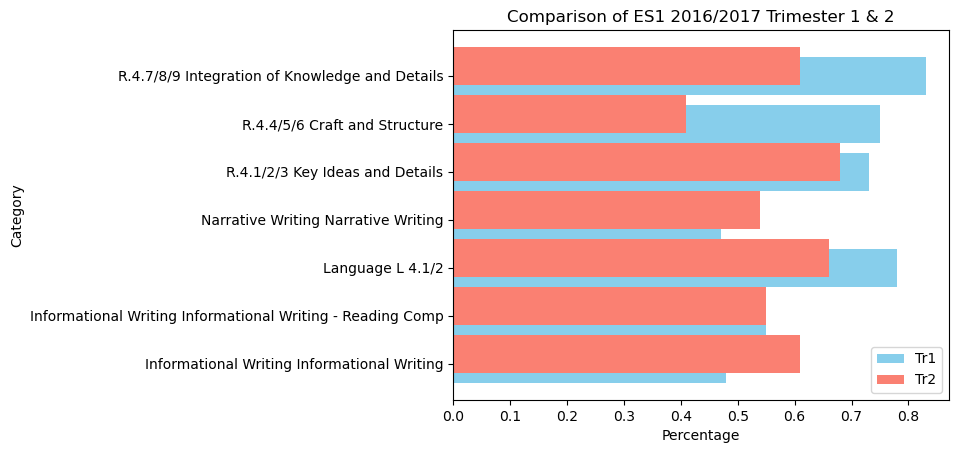

In [31]:
import matplotlib.pyplot as plt

# Plotting function
def plot_horizontal_bars(dataframe):
    # Initialize a variable to keep track of the y-position
    y_position = 0
    
    # Iterate over rows of the DataFrame
    for index, row in dataframe.iterrows():
        category = row.iloc[0]  # Access the first column value as a string
        tr1_value = row['Tr1']
        tr2_value = row['Tr2']
        
        # Plot invisible bars for Tr1 and Tr2
        plt.barh(y_position, 0, color='skyblue', label='Tr1')
        plt.barh(y_position + 0.2, 0, color='salmon', label='Tr2')
        
        # Plot visible bars for Tr1 and Tr2
        plt.barh(y_position, tr1_value, color='skyblue')
        plt.barh(y_position + 0.2, tr2_value, color='salmon')
        
        # Increment the y-position for the next set of bars
        y_position += 1
    
    # Add labels and title
    plt.xlabel('Percentage')
    plt.ylabel('Category')
    plt.title('Comparison of ES1 2016/2017 Trimester 1 & 2')
    plt.yticks(range(len(dataframe)), dataframe.iloc[:, 0])  # Set y-ticks to category labels
    
    # Add legend manually
    plt.legend(['Tr1', 'Tr2'])
    
    # Show the plot
    plt.show()

# Call the function with df_combined
plot_horizontal_bars(df_combined)


In [32]:
from IPython.display import HTML

# Loop thru the clusters for ES1 Tr1 & Tr2. Compare any common clusters reported in the datasets.

data = []

Tr1 = ELA_CTA_DATA['ES2_4thGrade_Tri1_20162017'].iloc[:, 3:]
Tr2 = ELA_CTA_DATA['ES2_4thGrade_Tri2_20162017'].iloc[:, 3:]

# These clusters are in common Tr1 & Tr2 for 2016/2017
for col in Tr2.columns:
    if( col in Tr1.columns):
        
        data.append( (col, Tr2[col][1], Tr1[col][1]))

df_combined = pd.DataFrame(data)
df_combined.columns = ['ES2 4thGrade 2016-2017 Overall % for Standard Clusters', 'Tr1', 'Tr2']

df_combined = df_combined.reset_index(drop=True)

HTML(df_combined.to_html(index=False))


ES2 4thGrade 2016-2017 Overall % for Standard Clusters,Tr1,Tr2
"Informational Writing Informational Writing - Focus, Organization, Support",0.54,0.38
"Narrative Writing Narrative Writing - Focus, Organization, Narrative Techniques",0.48,0.40
R.4.1/2/3 Key Ideas and Details - RI.4.1 Refer to details and examples in a text when explaining what the text says explicitly and when drawing inferences from the text.,0.63,0.64
R.4.1/2/3 Key Ideas and Details - RL.4.1 Refer to details and examples in a text when explaining what the text says explicitly and when drawing inferences from the text.,0.71,0.59
"R.4.1/2/3 Key Ideas and Details - RL.4.2 Determine a theme of a story, drama, or poem from details in the text; summarize the text.",0.75,0.65
"R.4.1/2/3 Key Ideas and Details - RL.4.3 Describe in depth a character, setting, or event in a story or drama, drawing on specific details in the text (e.g., a character's thoughts, words, or actions).",0.64,0.33
R.4.4/5/6 Craft and Structure - RI.4.4 Determine the meaning of general academic and domain-specific words or phrases in a text relevant to a grade 4 topic or subject area.,0.70,0.27
"R.4.4/5/6 Craft and Structure - RI.4.5 Describe the overall structure (e.g., chronology, comparison, cause/effect, problem/solution) of events, ideas, concepts, or information in a text or part of a text.",0.52,0.33
R.4.7/8/9 Integration of Knowledge and Details - RI.4.8 Explain how an author uses reasons and evidence to support particular points in a text.,0.69,0.51


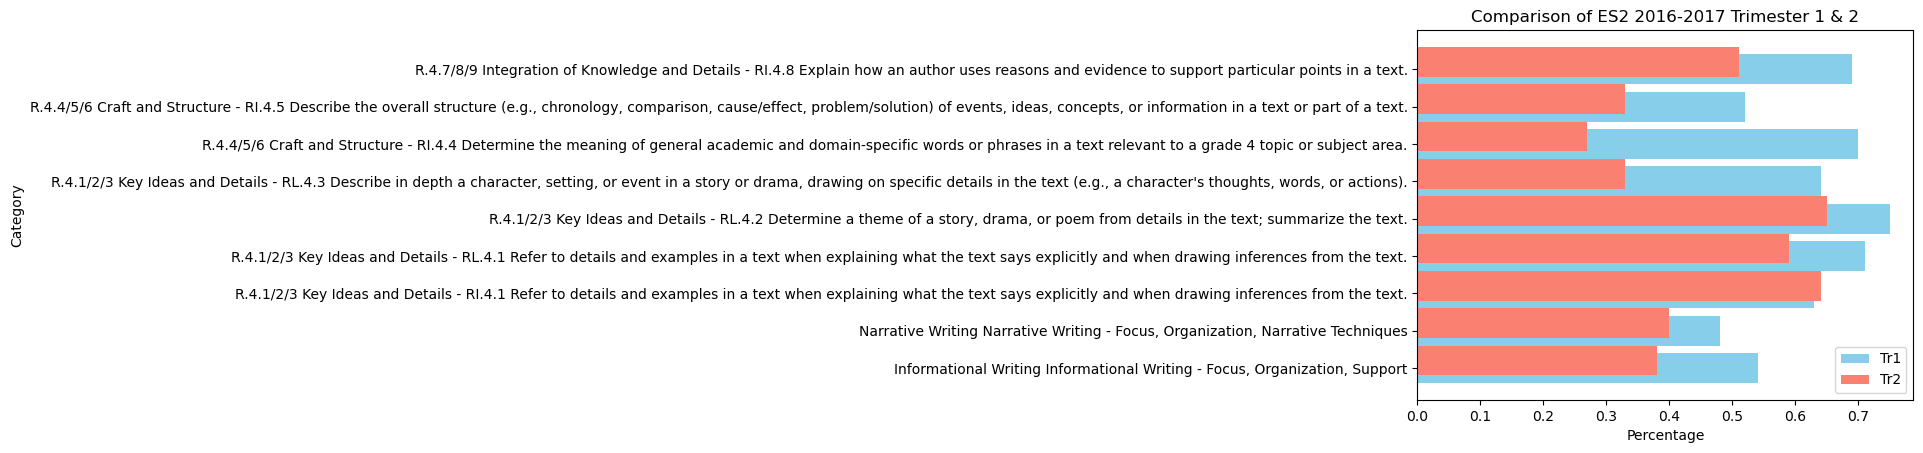

In [33]:
import matplotlib.pyplot as plt

# Plotting function
def plot_horizontal_bars(dataframe):
    # Initialize a variable to keep track of the y-position
    y_position = 0
    
    # Iterate over rows of the DataFrame
    for index, row in dataframe.iterrows():
        category = row.iloc[0]  # Access the first column value as a string
        tr1_value = row['Tr1']
        tr2_value = row['Tr2']
        
        # Plot invisible bars for Tr1 and Tr2
        plt.barh(y_position, 0, color='skyblue', label='Tr1')
        plt.barh(y_position + 0.2, 0, color='salmon', label='Tr2')
        
        # Plot visible bars for Tr1 and Tr2
        plt.barh(y_position, tr1_value, color='skyblue')
        plt.barh(y_position + 0.2, tr2_value, color='salmon')
        
        # Increment the y-position for the next set of bars
        y_position += 1
    
    # Add labels and title
    plt.xlabel('Percentage')
    plt.ylabel('Category')
    plt.title('Comparison of ES2 2016-2017 Trimester 1 & 2')
    plt.yticks(range(len(dataframe)), dataframe.iloc[:, 0])  # Set y-ticks to category labels
    
    # Add legend manually
    plt.legend(['Tr1', 'Tr2'])
    
    # Show the plot
    plt.show()

# Call the function with df_combined
plot_horizontal_bars(df_combined)


In [34]:
from IPython.display import HTML

# Loop thru the clusters for ES1 Tr1 & Tr2. Compare any common clusters reported in the datasets.

data = []

Tr1 = ELA_CTA_DATA['ES1_4thGrade_Tri1_20172018'].iloc[:, 3:]
Tr2 = ELA_CTA_DATA['ES1_4thGrade_Tri2_20172018'].iloc[:, 3:]

# These clusters are in common Tr1 & Tr2 for 2017/2018
for col in Tr2.columns:
    if( col in Tr1.columns):
        
        data.append( (col, Tr2[col][1], Tr1[col][1]))

df_combined = pd.DataFrame(data)
df_combined.columns = ['ES1 4thGrade 2017-2018 Overall % for Standard Clusters', 'Tr1', 'Tr2']

df_combined = df_combined.reset_index(drop=True)

HTML(df_combined.to_html(index=False))


ES1 4thGrade 2017-2018 Overall % for Standard Clusters,Tr1,Tr2
Language L 4.1/2,0.76,0.80
Narrative Writing Narrative Writing,0.58,0.50
R.4.1/2/3 Key Ideas and Details - RI.4.1 Refer to details and examples in a text when explaining what the text says explicitly and when drawing inferences from the text.,0.74,0.77
R.4.1/2/3 Key Ideas and Details - RL.4.1 Refer to details and examples in a text when explaining what the text says explicitly and when drawing inferences from the text.,0.79,0.62
"R.4.1/2/3 Key Ideas and Details - RL.4.2 Determine a theme of a story, drama, or poem from details in the text; summarize the text.",0.58,0.76
"R.4.1/2/3 Key Ideas and Details - RL.4.3 Describe in depth a character, setting, or event in a story or drama, drawing on specific details in the text (e.g., a character's thoughts, words, or actions).",0.65,0.52
R.4.4/5/6 Craft and Structure - RI.4.4 Determine the meaning of general academic and domain-specific words or phrases in a text relevant to a grade 4 topic or subject area.,0.64,0.35
"R.4.4/5/6 Craft and Structure - RI.4.5 Describe the overall structure (e.g., chronology, comparison, cause/effect, problem/solution) of events, ideas, concepts, or information in a text or part of a text.",0.55,0.43
R.4.7/8/9 Integration of Knowledge and Details - RI.4.8 Explain how an author uses reasons and evidence to support particular points in a text.,0.81,0.52


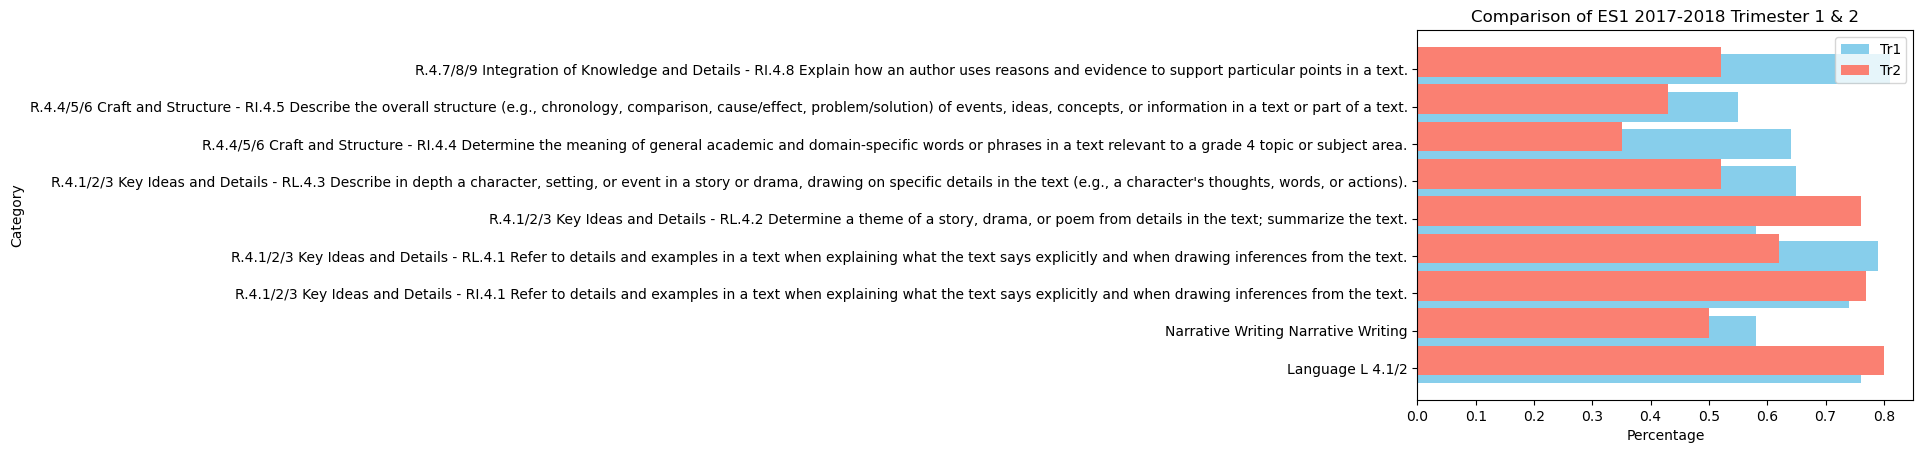

In [35]:
import matplotlib.pyplot as plt

# Plotting function
def plot_horizontal_bars(dataframe):
    # Initialize a variable to keep track of the y-position
    y_position = 0
    
    # Iterate over rows of the DataFrame
    for index, row in dataframe.iterrows():
        category = row.iloc[0]  # Access the first column value as a string
        tr1_value = row['Tr1']
        tr2_value = row['Tr2']
        
        # Plot invisible bars for Tr1 and Tr2
        plt.barh(y_position, 0, color='skyblue', label='Tr1')
        plt.barh(y_position + 0.2, 0, color='salmon', label='Tr2')
        
        # Plot visible bars for Tr1 and Tr2
        plt.barh(y_position, tr1_value, color='skyblue')
        plt.barh(y_position + 0.2, tr2_value, color='salmon')
        
        # Increment the y-position for the next set of bars
        y_position += 1
    
    # Add labels and title
    plt.xlabel('Percentage')
    plt.ylabel('Category')
    plt.title('Comparison of ES1 2017-2018 Trimester 1 & 2')
    plt.yticks(range(len(dataframe)), dataframe.iloc[:, 0])  # Set y-ticks to category labels
    
    # Add legend manually
    plt.legend(['Tr1', 'Tr2'])
    
    # Show the plot
    plt.show()

# Call the function with df_combined
plot_horizontal_bars(df_combined)


In [36]:
from IPython.display import HTML

# Loop thru the clusters for ES1 Tr1 & Tr2. Compare any common clusters reported in the datasets.

data = []

Tr1 = ELA_CTA_DATA['ES2_4thGrade_Tri1_20172018'].iloc[:, 3:]
Tr2 = ELA_CTA_DATA['ES2_4thGrade_Tri2_20172018'].iloc[:, 3:]

# These clusters are in common Tr1 & Tr2 for 2017/2018
for col in Tr2.columns:
    if( col in Tr1.columns):
        
        data.append( (col, Tr2[col][1], Tr1[col][1]))

df_combined = pd.DataFrame(data)
df_combined.columns = ['ES2 4thGrade 2017-2018 Overall % for Standard Clusters', 'Tr1', 'Tr2']

df_combined = df_combined.reset_index(drop=True)

HTML(df_combined.to_html(index=False))


ES2 4thGrade 2017-2018 Overall % for Standard Clusters,Tr1,Tr2
"Informational Writing Informational Writing - Focus, Organization, Support",0.55,0.48
Language L 4.1/2,0.67,0.63
"Narrative Writing Narrative Writing - Focus, Organization, Narrative Techniques",0.48,0.42
"Opinion Writing Opinion Writing - Focus, Organization, Support",0.56,0.49
R.4.1/2/3 Key Ideas and Details - RI.4.1 Refer to details and examples in a text when explaining what the text says explicitly and when drawing inferences from the text.,0.76,0.75
R.4.1/2/3 Key Ideas and Details - RL.4.1 Refer to details and examples in a text when explaining what the text says explicitly and when drawing inferences from the text.,0.80,0.63
"R.4.1/2/3 Key Ideas and Details - RL.4.2 Determine a theme of a story, drama, or poem from details in the text; summarize the text.",0.62,0.67
"R.4.1/2/3 Key Ideas and Details - RL.4.3 Describe in depth a character, setting, or event in a story or drama, drawing on specific details in the text (e.g., a character's thoughts, words, or actions).",0.65,0.49
R.4.4/5/6 Craft and Structure - RI.4.4 Determine the meaning of general academic and domain-specific words or phrases in a text relevant to a grade 4 topic or subject area.,0.69,0.23
"R.4.4/5/6 Craft and Structure - RI.4.5 Describe the overall structure (e.g., chronology, comparison, cause/effect, problem/solution) of events, ideas, concepts, or information in a text or part of a text.",0.58,0.17


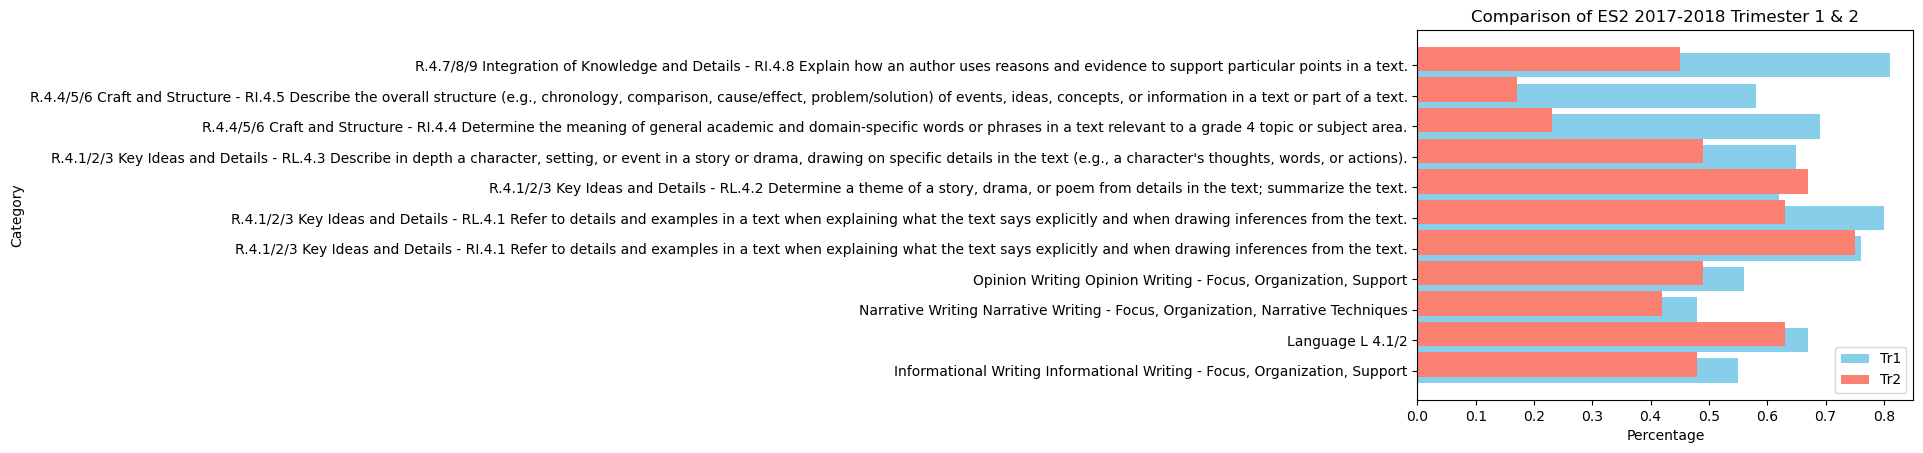

In [37]:
import matplotlib.pyplot as plt

# Plotting function
def plot_horizontal_bars(dataframe):
    # Initialize a variable to keep track of the y-position
    y_position = 0
    
    # Iterate over rows of the DataFrame
    for index, row in dataframe.iterrows():
        category = row.iloc[0]  # Access the first column value as a string
        tr1_value = row['Tr1']
        tr2_value = row['Tr2']
        
        # Plot invisible bars for Tr1 and Tr2
        plt.barh(y_position, 0, color='skyblue', label='Tr1')
        plt.barh(y_position + 0.2, 0, color='salmon', label='Tr2')
        
        # Plot visible bars for Tr1 and Tr2
        plt.barh(y_position, tr1_value, color='skyblue')
        plt.barh(y_position + 0.2, tr2_value, color='salmon')
        
        # Increment the y-position for the next set of bars
        y_position += 1
    
    # Add labels and title
    plt.xlabel('Percentage')
    plt.ylabel('Category')
    plt.title('Comparison of ES2 2017-2018 Trimester 1 & 2')
    plt.yticks(range(len(dataframe)), dataframe.iloc[:, 0])  # Set y-ticks to category labels
    
    # Add legend manually
    plt.legend(['Tr1', 'Tr2'])
    
    # Show the plot
    plt.show()

# Call the function with df_combined
plot_horizontal_bars(df_combined)


## Questions to ask

- How should new students be handled? Some students are in Tr1, but not Tr2 and vice-versa.  
  For those StudentIDs in Tr2 and missing in Tr1 I recorded the same grade thereby causing no change in grades.
  
- How to handle scholars that have a StudentID yet have no entries as if they missed the exam.
- Exam clusters don't have the same name across the Tr1 data sets making it difficult to compare or look for trends from year to year. For example, I can't determine if two clusters are the same if they have similar names.
- For the clusers, why were those particular question scores given?
- Are all of the clusters listed or is that partial listing?


I would also like to note that there are many discrepencies in the percentage calculations.
For example, for question #10[5] the overall percentage is listed as 54%, but the actual average is 52.5%.
The overall Average column C may not show the correct percentage. 
For some trimesters I found the calculations to match exactly as what I have, others no.  
For example, I verified the overall average per student by averaging the individual cluster overall scores.
My overall averages per student are very different from what's shown in column C.  
It's difficult to know why without have the formula in the Excel sheets.
This would certainly skew my prediction models.

I would want to see all of the metrics available for the students in order to build a more reliable model or predictor of future performance.
Some of those metrics could be
- zip code
- parent's education level
- household income
- attendance records
- ADHD diagnosis or similar condition
- gender
- Age


I learned a lot with this exercise. I took my time to understand what the data was telling me and how it was organized.  
Going at it alone and seeing this data for the first time made it challenging to say the least, but I felt it was part of the process and I feel confident about handling similar situations in the future.